In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
#Load data in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/big-data/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/big-data/test.csv')
sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/big-data/sample_submission.csv')

In [ ]:
df = train_df.copy()

In [ ]:
df = df.sample(n= 100000, random_state=444)

In [ ]:
df.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
689557,1084833,0.0,Richard Greenamyer; The first crime they commi...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-06 18:04:20.013691+00,55,NaN,317168,approved,0,0,0,8,0,0.0,0,6
371887,698106,0.0,Nonsense. The bias is all with you franko. He ...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-12 16:46:30.943496+00,54,697932.0,156046,approved,0,0,0,2,2,0.0,0,4
264617,566928,0.0,Do you have a source for that info????,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01 11:02:50.637489+00,13,566752.0,150102,approved,0,0,0,0,0,0.0,0,4
1163060,5537743,0.0,Mr Scheer makes a few good observations -- the...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-06 09:38:39.306671+00,54,NaN,352251,approved,1,0,0,5,10,0.0,0,4
1337632,5750161,0.3,I am wondering when the US will be sanctioned?...,0.0,0.1,0.1,0.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-11 15:24:01.329770+00,22,NaN,365436,approved,0,0,1,2,1,0.0,0,10
826457,5132407,0.0,Not bad and it's only going to cost us 1 billion.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-14 07:32:20.733766+00,55,5128670.0,326621,approved,0,0,0,0,0,0.0,0,4
179648,461236,0.0,Just a couple of questions for SkinnerAK. What...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:05:25.296135+00,21,NaN,145287,approved,0,0,0,4,0,0.0,0,4
1022304,5367315,0.4,I am most proud and thankful for the role our ...,0.0,0.0,0.2,0.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06 17:32:14.731941+00,66,NaN,341282,approved,0,0,0,0,0,0.0,0,10
828314,5134541,0.0,Because_they_can_be_out_and_proud_in_real_life,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-14 21:59:45.149709+00,53,5132110.0,326633,approved,0,0,0,3,0,0.0,0,4
260542,562279,0.0,"Judge as you wish, Blankenyblank, as I have ab...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-29 22:46:44.139631+00,21,562268.0,149978,approved,0,0,0,2,0,0.0,0,4


In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
Vectorize = TfidfVectorizer()

X = Vectorize.fit_transform(df["comment_text"])

test_X = Vectorize.transform(test_df["comment_text"])

In [ ]:
y = np.where(df['target'] >= 0.5, 1, 0)

In [ ]:
X.shape, y.shape, test_X.shape

((100000, 77926), (100000,), (97320, 77926))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)

In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [ ]:
cv_accuracy = cross_val_score(lr, X, y, scoring='roc_auc')
print(cv_accuracy)
print(cv_accuracy.mean())

[0.9135473  0.91683731 0.91377647 0.91424029 0.90737529]
0.913155334034421


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27668
           1       0.87      0.23      0.36      2332

    accuracy                           0.94     30000
   macro avg       0.90      0.61      0.66     30000
weighted avg       0.93      0.94      0.92     30000



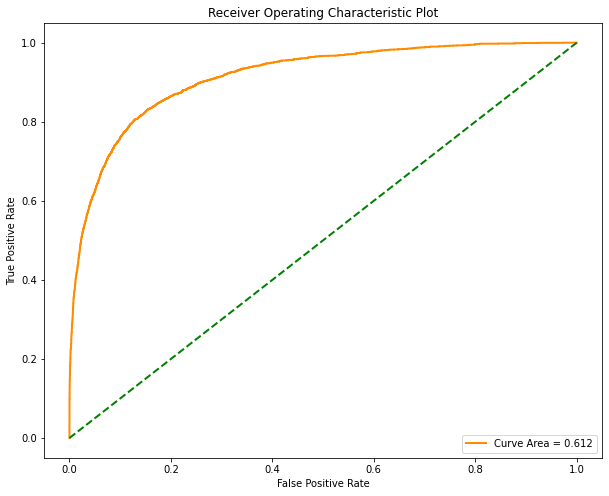

In [ ]:
fpr, tpr, thr = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = lr.predict_proba(test_X)[:,1]

In [ ]:
sub['prediction'] = predictions
sub.to_csv('/content/drive/My Drive/Colab Notebooks/big-data/sample_submission.csv', index=False)

In [ ]:
sub.head(15)

,id,prediction
0,7097320,0.074040
1,7097321,0.056514
2,7097322,0.212822
3,7097323,0.041847
4,7097324,0.029402
5,7097325,0.026822
6,7097326,0.505256
7,7097327,0.240384
8,7097328,0.023125
9,7097329,0.035304
